<a href="https://colab.research.google.com/github/rafalopes74/EnergyConsumptionAI/blob/main/EnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, TimeDistributed
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.preprocessing import MinMaxScaler

In [202]:
!pip install holidays --upgrade

In [203]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import holidays
plt.style.use('ggplot')

In [204]:
!wget --no-clobber https://raw.githubusercontent.com/rafalopes74/EnergyConsumptionAI/main/DAYTON_hourly.csv


File ‘DAYTON_hourly.csv’ already there; not retrieving.



In [205]:
data = pd.read_csv("/content/DAYTON_hourly.csv", header = 'infer', parse_dates = True)
data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data.set_index("Datetime")

#data.resample('3H').sum()
#data = data.resample('6H').sum()
data = data.resample('12H').sum()
#data.resample('1D').sum()
#data.resample('1W').sum()
#data.resample('1Y').sum()
#data.groupby([data.index.year == 2015,data.index.month <3 ])['DAYTON_MW'].sum()

In [206]:
data.shape

(10109, 1)

In [207]:
data.tail(5)

,DAYTON_MW
Datetime,
2018-08-01 00:00:00,22046.0
2018-08-01 12:00:00,27401.0
2018-08-02 00:00:00,22058.0
2018-08-02 12:00:00,29979.0
2018-08-03 00:00:00,2042.0


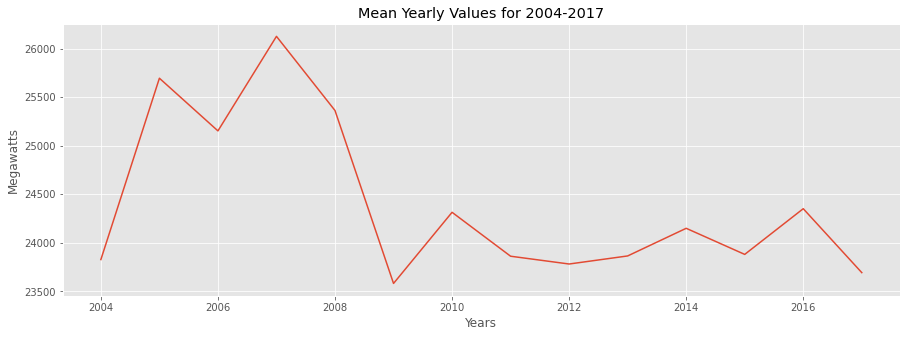

In [208]:
# YEARLY CONSUMPTIONS

mean_yearly_consumptions = []
years = []

for i in range(2004, 2018):
  mean_yearly_consumptions.append(data[data.index.year == i].mean())
  years.append(i)

plt.figure(figsize = (15, 5))
plt.plot(years, mean_yearly_consumptions)

plt.title("Mean Yearly Values for 2004-2017")
plt.xlabel("Years")
plt.ylabel("Megawatts")

plt.show()

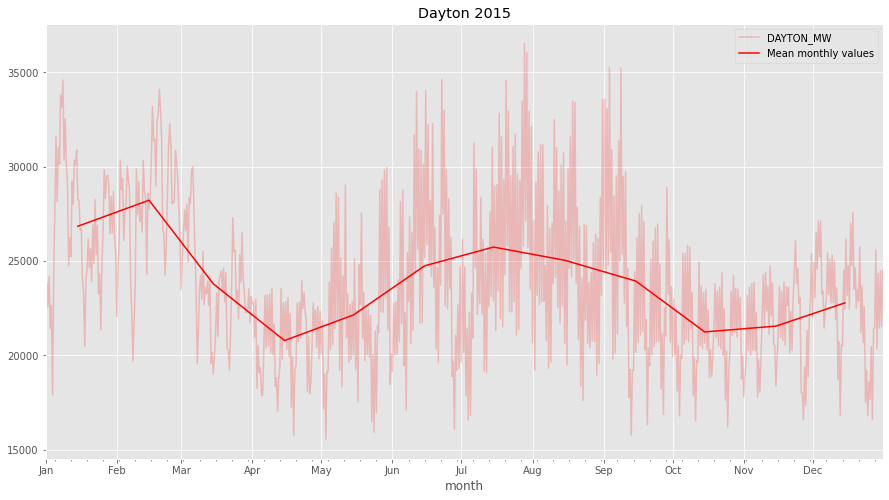

In [209]:
year_2015 = data[data.index.year == 2015]

month_mean_values = []
months = []
xticks = []
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in (range(1,13)):
    month_mean_values.append(year_2015[(year_2015.index.month == i)]['DAYTON_MW'].mean())
    months.append(datetime.datetime(2015, i, 15))
    xticks.append(datetime.datetime(2015, i, 1)) 

month = pd.DataFrame({'Mean monthly values': month_mean_values, 'month':months })
month = month.set_index('month')

base=year_2015.plot(color='red',alpha=0.20, figsize = (15, 8), title = 'Dayton 2015')
month.plot(color='red', alpha=1.0, ax=base)
plt.xticks(xticks, month_names)

plt.show()

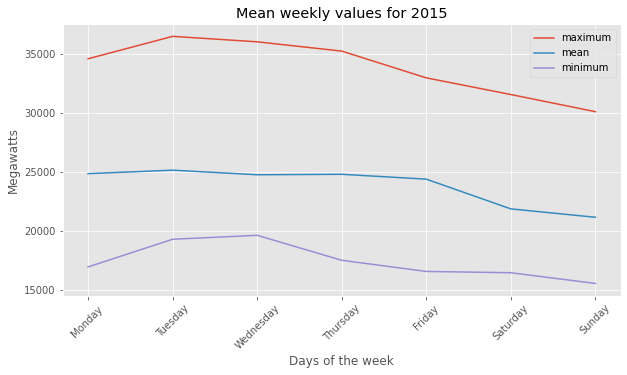

In [210]:
# VALUES BY WEEKDAY

mean_weekday = []
max_weekday = []
min_weekday = []
weekdays = ['Monday ', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0, 7):
  mean_weekday.append(data[(data.index.year == 2015) & (data.index.weekday == i)].mean())
  max_weekday.append( data[(data.index.year == 2015) & (data.index.weekday == i)].max())
  min_weekday.append( data[(data.index.year == 2015) & (data.index.weekday == i)].min())

plt.figure(figsize = (10, 5))
plt.plot(weekdays, max_weekday, weekdays, mean_weekday, weekdays, min_weekday)

plt.title('Mean weekly values for 2015')
plt.xlabel('Days of the week')
plt.ylabel('Megawatts')
plt.xticks(weekdays, rotation = 45)
plt.legend(['maximum', 'mean', 'minimum'])

plt.show()

In [211]:
"""
weekday = pd.DataFrame({'DAYTON_MW' : []})
weekend = []
public_holiday = []

ohio_holidays = holidays.country_holidays('US', subdiv='OH', years=2015)

for holiday in ohio_holidays:
  pd.concat( [weekday, data[(data.index.year == 2015) & (data.index.weekday < 5) & (data.index.date != holiday)]] )
  weekend.append(data[(data.index.year == 2015) & (5 <= data.index.weekday) & (data.index.weekday == 6)])
  public_holiday.append(data[(data.index.year == 2015) & (5 <= data.index.weekday) & (data.index.date == holiday)])

#print(data)
#plt.boxplot(list(weekday))
"""

"\nweekday = pd.DataFrame({'DAYTON_MW' : []})\nweekend = []\npublic_holiday = []\n\nohio_holidays = holidays.country_holidays('US', subdiv='OH', years=2015)\n\nfor holiday in ohio_holidays:\n  pd.concat( [weekday, data[(data.index.year == 2015) & (data.index.weekday < 5) & (data.index.date != holiday)]] )\n  weekend.append(data[(data.index.year == 2015) & (5 <= data.index.weekday) & (data.index.weekday == 6)])\n  public_holiday.append(data[(data.index.year == 2015) & (5 <= data.index.weekday) & (data.index.date == holiday)])\n\n#print(data)\n#plt.boxplot(list(weekday))\n"

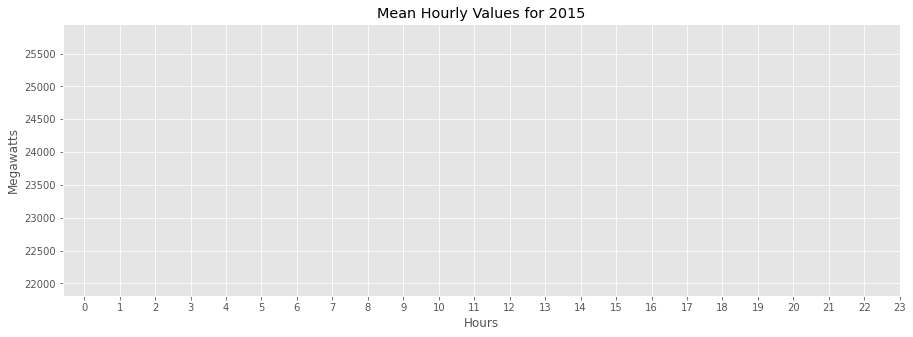

In [212]:
#           MEAN HOURLY VALUES

mean_hourly_values = []
hours = [x for x in range(0, 24)]

for i in range(0, 24):
  mean_hourly_values.append(data[(data.index.year == 2015) & (data.index.hour == i)].mean())

plt.figure(figsize = (15, 5))
plt.plot(hours, mean_hourly_values)

plt.title("Mean Hourly Values for 2015")
plt.xlabel("Hours")
plt.ylabel("Megawatts")
plt.xticks(hours)

plt.show()

In [213]:
pila = data.groupby([data.index.year,data.index.month])['DAYTON_MW'].sum()

In [214]:
pd.DataFrame(pila)

DAYTON_MW
Datetime Datetime           
2004     10        1384929.0
         11        1389752.0
         12        1609563.0
2005     1         1651454.0
         2         1448563.0
...                      ...
2018     4         1327017.0
         5         1464981.0
         6         1524912.0
         7         1599236.0
         8          103526.0

[167 rows x 1 columns]

Preprocessing

In [215]:
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(data[data.index.year == 2015])

In [216]:
"""def preprocessData(data, seq_len):
  scaler = MinMaxScaler()
  ts_scaled = scaler.fit_transform(data)

  X_train = []
  y_train = []

  for i in range(seq_len, len(data)):
      X_train.append(data.iloc[i-seq_len : i, 0])
      y_train.append(data.iloc[i, 0])

  #1 last 6189 days are going to be used in test
  X_test = X_train[110000:]             
  y_test = y_train[110000:]

  #2 first 110000 days are going to be used in training
  X_train = X_train[:110000]           
  y_train = y_train[:110000]

  #3 convert to numpy array
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_test = np.array(X_test)
  y_test = np.array(y_test)

  #4 reshape data to input into RNN models
  X_train = np.reshape(X_train, (110000, seq_len, 1))

  X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

  return [X_train, y_train, X_test, y_test]"""

'def preprocessData(data, seq_len):\n  scaler = MinMaxScaler()\n  ts_scaled = scaler.fit_transform(data)\n\n  X_train = []\n  y_train = []\n\n  for i in range(seq_len, len(data)):\n      X_train.append(data.iloc[i-seq_len : i, 0])\n      y_train.append(data.iloc[i, 0])\n\n  #1 last 6189 days are going to be used in test\n  X_test = X_train[110000:]             \n  y_test = y_train[110000:]\n\n  #2 first 110000 days are going to be used in training\n  X_train = X_train[:110000]           \n  y_train = y_train[:110000]\n\n  #3 convert to numpy array\n  X_train = np.array(X_train)\n  y_train = np.array(y_train)\n\n  X_test = np.array(X_test)\n  y_test = np.array(y_test)\n\n  #4 reshape data to input into RNN models\n  X_train = np.reshape(X_train, (110000, seq_len, 1))\n\n  X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))\n\n  return [X_train, y_train, X_test, y_test]'

In [217]:
# Reshaping.
ts_scaled_2 = ts_scaled.reshape(1,-1,1)             # (batch_size, time series length, n_input)
ts_scaled_2

array([[[0.36714422],
        [0.39737345],
        [0.33323782],
        [0.41160458],
        [0.27893983],
        [0.33801337],
        [0.11198663],
        [0.41934097],
        [0.57927412],
        [0.76532951],
        [0.6008596 ],
        [0.73763133],
        [0.69522445],
        [0.87000955],
        [0.83949379],
        [0.90816619],
        [0.70544413],
        [0.8099809 ],
        [0.69417383],
        [0.6356256 ],
        [0.43853868],
        [0.50959885],
        [0.46136581],
        [0.65224451],
        [0.59407832],
        [0.70539637],
        [0.69493792],
        [0.73075454],
        [0.60510984],
        [0.60477555],
        [0.52884432],
        [0.53213945],
        [0.40329513],
        [0.36757402],
        [0.23471824],
        [0.40052531],
        [0.42984718],
        [0.50639924],
        [0.43295129],
        [0.48147087],
        [0.39823305],
        [0.54145177],
        [0.44450812],
        [0.60596944],
        [0.46633238],
        [0

Hyperparameters

In [218]:
n_epochs = 100                   
batch_size = 1                    # There is only 1 time series data. No other choice but 1. 
learn_rate = 0.0002   

n_input = 1                       # Scalar input.
n_neurons = 10                   # N# of neurons per layer.
n_output = 1                      # Scalar output.

In [219]:
# RNN or LSTM network.
# return_sequnces = True: means "Sequence to Sequence".
# input_shape = (None, n_inputs) : variable length of the time series.
my_model = Sequential()
my_model.add(SimpleRNN(units=n_neurons,return_sequences=True, input_shape=(None, n_input)))     # RNN.
#my_model.add(LSTM(units=n_neurons,return_sequences=True, input_shape=(None, n_input)))         # LSTM.
my_model.add(TimeDistributed(Dense(units=n_output, activation="linear")))    # Wrapper.

In [220]:
# View the summary.
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 10)          120       
                                                                 
 time_distributed_4 (TimeDis  (None, None, 1)          11        
 tributed)                                                       
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [221]:
# Define the optimizer and compile.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "mse", optimizer = my_optimizer, metrics=["mse"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [222]:
# No validation.
# CAUTION: y is X shifted by +1.
my_summary = my_model.fit(ts_scaled_2[:,:-1,:], ts_scaled_2[:,1:,:], epochs=n_epochs, batch_size = batch_size, verbose = 0)

In [223]:
my_summary.history.keys()

dict_keys(['loss', 'mse'])

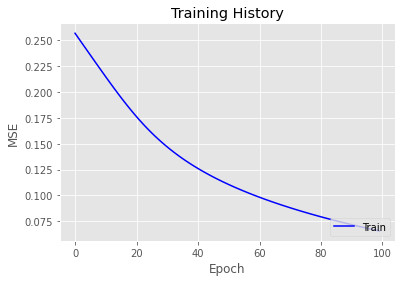

In [224]:
plt.plot(my_summary.history['mse'], c="b")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [231]:
n_ts_seed = 400                                 # Seed length.
n_predict_time_steps = 4                    # Prediction length.

In [233]:
# Prediction loop.
ts_seed = ts_scaled[0:n_ts_seed]
for i in range(n_predict_time_steps):
    X = ts_seed.reshape(1,-1,1)        # Reshape.     
    y_pred = my_model.predict(X)
    y_last= y_pred[0,-1,0]             # The last output is the predicted y.
    ts_seed = np.concatenate((ts_seed, np.array([y_last]).reshape(1,1)), axis=0)

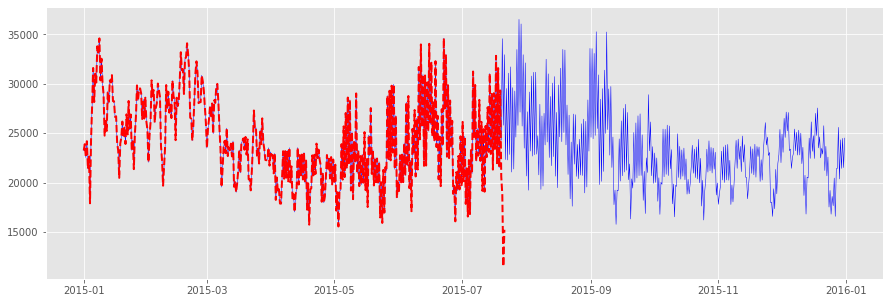

In [234]:
# Do the inverse transform and show the times series. 
ts = scaler.inverse_transform(ts_seed)
ts = ts.reshape(-1)
y = pd.DataFrame({'prediction' : ts}, index = data[data.index.year == 2015].iloc[:n_ts_seed + n_predict_time_steps].index)


plt.figure(figsize = (15, 5))
plt.plot(data[data.index.year == 2015].DAYTON_MW, c='b',linewidth=0.5, linestyle="-",label="Data")
plt.plot(y, c='r',linewidth=2, linestyle="--",label="Fit")
plt.show()